In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000007789"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000007789
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,ASSOCIATED BANC-CORP
Ticker,ASB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,1.784351e+01,1.736277e+00,1.318000e+01,1.682000e+01,1.799000e+01,1.877000e+01,2.177000e+01
interest income,57.0,2.321446e+08,5.263665e+07,1.753520e+08,1.860530e+08,2.067890e+08,2.788690e+08,3.246080e+08
net income,57.0,4.678914e+07,3.855702e+07,-1.732370e+08,4.263300e+07,4.873800e+07,6.945600e+07,8.919200e+07
net interest income,57.0,1.717017e+08,1.851401e+07,1.332160e+08,1.601820e+08,1.671990e+08,1.785340e+08,2.263620e+08
provision for loan losses,57.0,2.874675e+07,6.171863e+07,-5.000000e+06,3.671000e+06,5.082000e+06,2.000000e+07,3.947890e+08
total revenue,10.0,2.543757e+08,8.561889e+06,2.431500e+08,2.497500e+08,2.540000e+08,2.572500e+08,2.740000e+08


# Plots

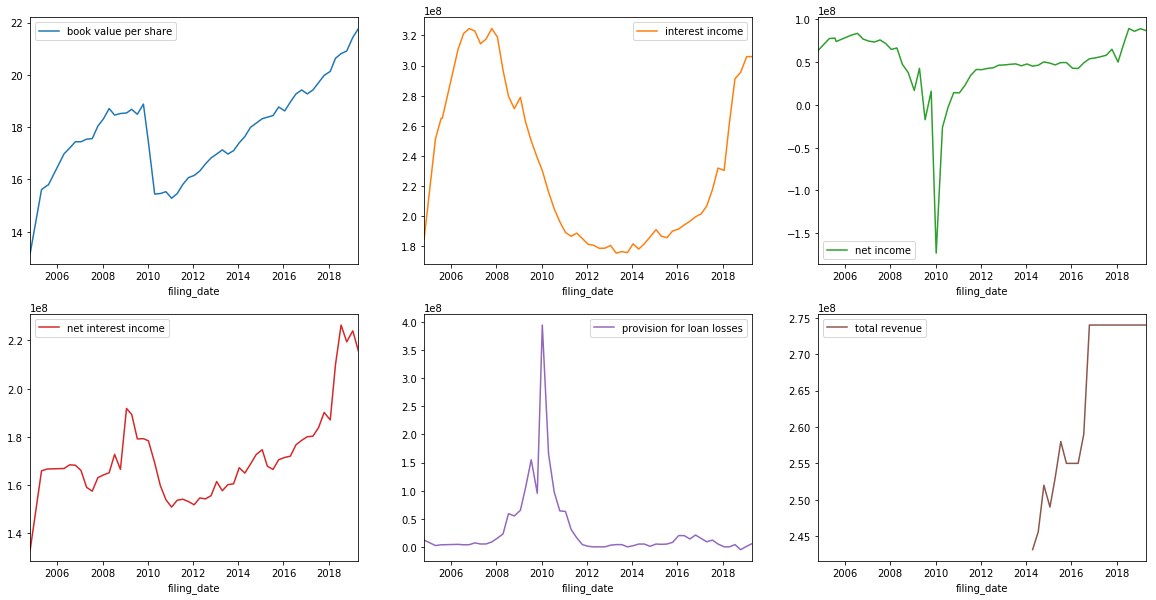

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000007789 book value per share        2003Q3 to 2004Q2: 4 periods  missing   
           book value per share                             2004Q4  missing   
           book value per share        2005Q3 to 2005Q4: 2 periods  missing   
           interest income             2003Q3 to 2004Q2: 4 periods  missing   
           interest income                                  2004Q4  missing   
           interest income             2005Q3 to 2005Q4: 2 periods  missing   
           net income                  2003Q3 to 2004Q2: 4 periods  missing   
           net income                                       2004Q4  missing   
           net income                  2005Q3 to 2005Q4: 2 periods  missing   
           net interest income         2003Q3 to 2004Q2: 4 periods  missing   
           net interest income                              2004Q4  missing   
           net interest income         2005Q3 to 2005Q4: 2 periods  missing   
           provision for loan losses   2003Q4 to 2004Q4: 5 periods  missing   
           provision for loan losses   2005Q3 to 2005Q4: 2 periods  missing   
           total revenue              2003Q3 to 2013Q4: 42 periods  missing   
           total revenue                                    2015Q4  missing   
           total revenue              2016Q4 to 2019Q1: 10 periods  missing   

                                             message  
cik        item                                       
0000007789 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()